In [1]:
# download example data
from downloaddata import download_example_data
download_example_data()

In [2]:
from wholeslidedata.iterators import create_batch_iterator
from matplotlib import pyplot as plt
import time 

In [7]:
import numpy as np

In [23]:
a = np.zeros((2, 10, 1000,1000, 100))

In [24]:
import sys

In [25]:
sys.getsizeof(a)

16000000168

# BatchIterator 

In [5]:
user_config = './configs/user_config.yml'
batches = 2 # how many batches that are going to be sampled, batchgenerator will be reset afterwards
repeats = 2
mode = 'training'

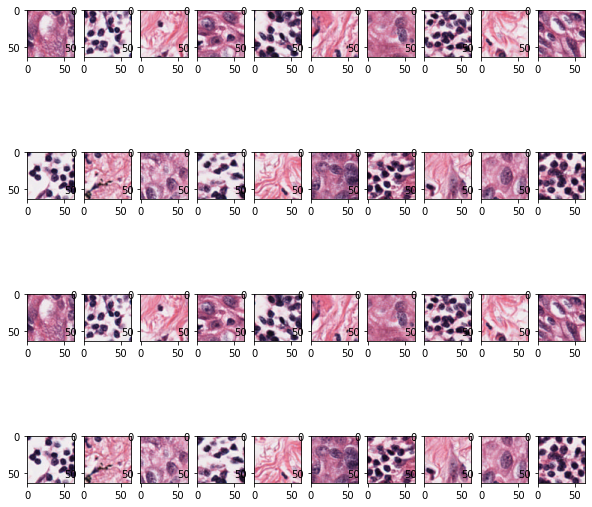

In [6]:
fig, axes = plt.subplots(batches*repeats,10, figsize=(10,10))
with create_batch_iterator(user_config=user_config, 
                            batches=batches, 
                            repeats=repeats, 
                            mode=mode) as training_batch_generator:
    
    for idx, (x_batch, y_batch) in enumerate(training_batch_generator):
        for batch_index in range(len(x_batch)):
            axes[idx][batch_index].imshow(x_batch[batch_index])
plt.show()

In [8]:
batches = 100
repeats = 10
# batch_size = 10 (see config)

# sampling 100*10*10=10000 patches:

In [5]:
cpus = 1
time1 = time.time()
with create_batch_iterator(user_config=user_config, 
                            batches=batches,
                            repeats=repeats, 
                            mode=mode, 
                            cpus=cpus) as training_batch_generator:
    
    for idx, (x_batch, y_batch) in enumerate(training_batch_generator):
        pass
    
print(time.time()-time1)

28.110646963119507


In [6]:
cpus = 4
time1 = time.time()
with create_batch_iterator(user_config=user_config, 
                            batches=batches, 
                            repeats=repeats, 
                            mode=mode, 
                            cpus=cpus) as training_batch_generator:
    
    for idx, (x_batch, y_batch) in enumerate(training_batch_generator):
        pass
    
print(time.time()-time1)

10.565228939056396


# Infinite BatchIterator 

## not reset functionallity

In [7]:
cpus = 4
time1 = time.time()
with create_batch_iterator(user_config=user_config, 
                            mode='training', 
                            cpus=cpus) as training_batch_generator:
    
    for _ in range(batches*repeats):
        x_batch, y_batch = next(training_batch_generator)
print(time.time()-time1)

8.7281653881073
